In [14]:
dataset_cache_dir = "/work1/dimda/dotav2-patches-crops-ship-cache"
dataset_cache_dir = "/work1/dimda/xView-patches-crops-ship-cache"
dataset_cache_dir = "/work1/dimda/xView-patches-crops-ship-sam-cache"
#DATA_DIR = "/work3/dimda/ultralytics_dotav2/examples/datasets/DOTA-v2.0-patches-ship-crops"
DATA_DIR = "/work1/dimda/xView-patches-crops-ship-sam"

In [2]:

%env WANDB_MODE=online
import wandb
run = wandb.init()
artifact = run.use_artifact('dimidagd_sl/fine_ship_classifier/model-4xpfe6yl:v0', type='model')
artifact_dir = artifact.download()

env: WANDB_MODE=online


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dimidagd (dimidagd_sl). Use `wandb login --relogin` to force relogin


wandb:   4 of 4 files downloaded.  


In [15]:
from datasets import load_dataset, load_from_disk
import os
if os.path.exists(dataset_cache_dir):
    dataset = load_from_disk(dataset_cache_dir)
else:
    dataset = load_dataset("imagefolder", data_dir=DATA_DIR)
    dataset.save_to_disk(dataset_cache_dir)

image = dataset["train"]["image"][0]

Resolving data files:   0%|          | 0/1695 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1695 [00:00<?, ? examples/s]

In [3]:
# Load xView-patches.yaml
import yaml
with open("/work3/dimda/ultralytics_dotav2/ultralytics/cfg/datasets/xView-patches.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)


In [5]:
from transformers import pipeline
p = pipeline("image-classification", model=artifact_dir)

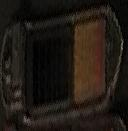

[]


[('Yacht', '1.00')]


[('Motorboat', '1.00')]


[('Motorboat', '1.00')]


[('Fishing Vessel', '1.00')]


[('Motorboat', '1.00')]


[('Motorboat', '1.00')]


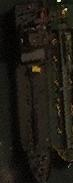

[('Yacht', '1.00')]


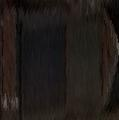

[]


[('Motorboat', '1.00')]


In [16]:
import random
random_samples = random.sample(dataset["train"]["image"], 10)
for image in random_samples:
    display(image)
    res = p(image)
    #print(res)
    label_names = dict()
    for k, v in config["names"].items():
        label_names["class_"+str(k)] = v
    res = [(label_names[r["label"]], format(r["score"], '.2f')) for r in res if r["score"] > 0.5]
    print(res)